<a href="https://colab.research.google.com/github/greiceh/projeto_mkt/blob/main/Estrat%C3%A9gia_ESG_Quant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PARTE 1

In [150]:
!pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
carteira = ['WEGE3.SA', 'LREN3.SA', 'BPAC11.SA', 'PRIO3.SA', 'EGIE3.SA', 'TAEE11.SA']

In [153]:
inicio = '2018-01-02'
fim = '2023-01-02'

In [154]:
cotacoes = yf.download(carteira, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [155]:
cotacoes

,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA
Date,,,,,,
2018-01-02,3.97,19.69,28.79,1.71,12.51,8.91
2018-01-03,4.01,19.56,29.15,1.74,12.53,8.77
2018-01-04,4.02,19.31,29.32,1.80,12.33,8.69
2018-01-05,4.09,19.41,29.14,1.90,12.39,8.72
2018-01-08,4.14,19.52,28.99,2.05,12.33,8.79
...,...,...,...,...,...,...
2022-12-23,24.34,38.09,21.65,35.49,33.51,38.23
2022-12-26,23.73,37.76,20.50,35.44,33.34,37.92
2022-12-27,23.17,37.56,20.17,35.58,32.99,37.74


In [156]:
cotacoes.columns

Index(['BPAC11.SA', 'EGIE3.SA', 'LREN3.SA', 'PRIO3.SA', 'TAEE11.SA',
       'WEGE3.SA'],
      dtype='object')

In [157]:
# Aportando mil reais em cada ação. Alocação montada como dicionário.

In [158]:
aportes = {'BPAC11.SA': 1000,
           'EGIE3.SA' : 1000, 
           'LREN3.SA' : 1000, 
           'PRIO3.SA' : 1000, 
           'TAEE11.SA': 1000,
           'WEGE3.SA' : 1000}

In [159]:
sum(aportes.values())

6000

In [160]:
primeiro = cotacoes.iloc[0]

In [161]:
list(aportes.keys())

['BPAC11.SA', 'EGIE3.SA', 'LREN3.SA', 'PRIO3.SA', 'TAEE11.SA', 'WEGE3.SA']

In [162]:
aportes_df = pd.Series(data = aportes, index = list(aportes.keys()))

In [163]:
qtd_acoes = aportes_df/primeiro

In [164]:
PL = cotacoes*qtd_acoes

In [165]:
PL.head()

,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA
Date,,,,,,
2018-01-02,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
2018-01-03,1009.52,993.28,1012.73,1018.14,1001.40,984.81
2018-01-04,1013.23,980.40,1018.39,1053.36,985.55,975.22
2018-01-05,1029.98,985.44,1012.16,1112.70,990.21,979.22
2018-01-08,1042.60,991.04,1007.07,1196.96,985.55,987.21


In [166]:
PL['PL Total'] = PL.sum(axis = 1)

In [167]:
PL.head()

,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA,PL Total
Date,,,,,,,
2018-01-02,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,6000.00
2018-01-03,1009.52,993.28,1012.73,1018.14,1001.40,984.81,6019.88
2018-01-04,1013.23,980.40,1018.39,1053.36,985.55,975.22,6026.16
2018-01-05,1029.98,985.44,1012.16,1112.70,990.21,979.22,6109.71
2018-01-08,1042.60,991.04,1007.07,1196.96,985.55,987.21,6210.44


In [168]:
# Obtendo dados do IBOV

In [169]:
ibov = yf.download ('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [170]:
ibov.rename(columns = {'Adj Close' : 'IBOV'}, inplace = True )

In [171]:
ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1, inplace = True)

In [172]:
ibov.head()

,IBOV
Date,
2018-01-02,77891.00
2018-01-03,77995.00
2018-01-04,78647.00
2018-01-05,79071.00
2018-01-08,79379.00


In [173]:
consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [174]:
consolidado.head()

,IBOV,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2018-01-02,77891.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,6000.00
2018-01-03,77995.00,1009.52,993.28,1012.73,1018.14,1001.40,984.81,6019.88
2018-01-04,78647.00,1013.23,980.40,1018.39,1053.36,985.55,975.22,6026.16
2018-01-05,79071.00,1029.98,985.44,1012.16,1112.70,990.21,979.22,6109.71
2018-01-08,79379.00,1042.60,991.04,1007.07,1196.96,985.55,987.21,6210.44


<Axes: xlabel='Date'>

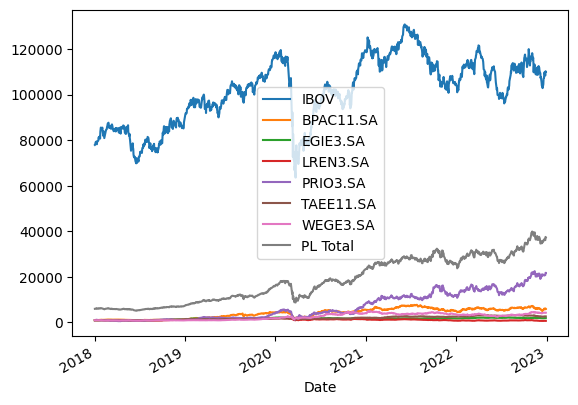

In [175]:
consolidado.plot()

In [176]:
#Comparando a carteira com o IBOV

In [177]:
consolidado_adj = consolidado/consolidado.iloc[0]

In [178]:
consolidado_adj.head()

,IBOV,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2018-01-02,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2018-01-03,1.00,1.01,0.99,1.01,1.02,1.00,0.98,1.00
2018-01-04,1.01,1.01,0.98,1.02,1.05,0.99,0.98,1.00
2018-01-05,1.02,1.03,0.99,1.01,1.11,0.99,0.98,1.02
2018-01-08,1.02,1.04,0.99,1.01,1.20,0.99,0.99,1.04


In [179]:
consolidado_adj.tail()

,IBOV,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2022-12-23,1.41,6.13,1.93,0.75,20.77,2.68,4.29,6.09
2022-12-26,1.40,5.98,1.92,0.71,20.74,2.66,4.26,6.04
2022-12-27,1.39,5.84,1.91,0.70,20.82,2.64,4.24,6.02
2022-12-28,1.42,6.13,1.92,0.72,21.80,2.68,4.31,6.26
2022-12-29,1.41,5.99,1.92,0.70,21.77,2.66,4.29,6.22


Text(0.5, 1.0, 'Carteira')

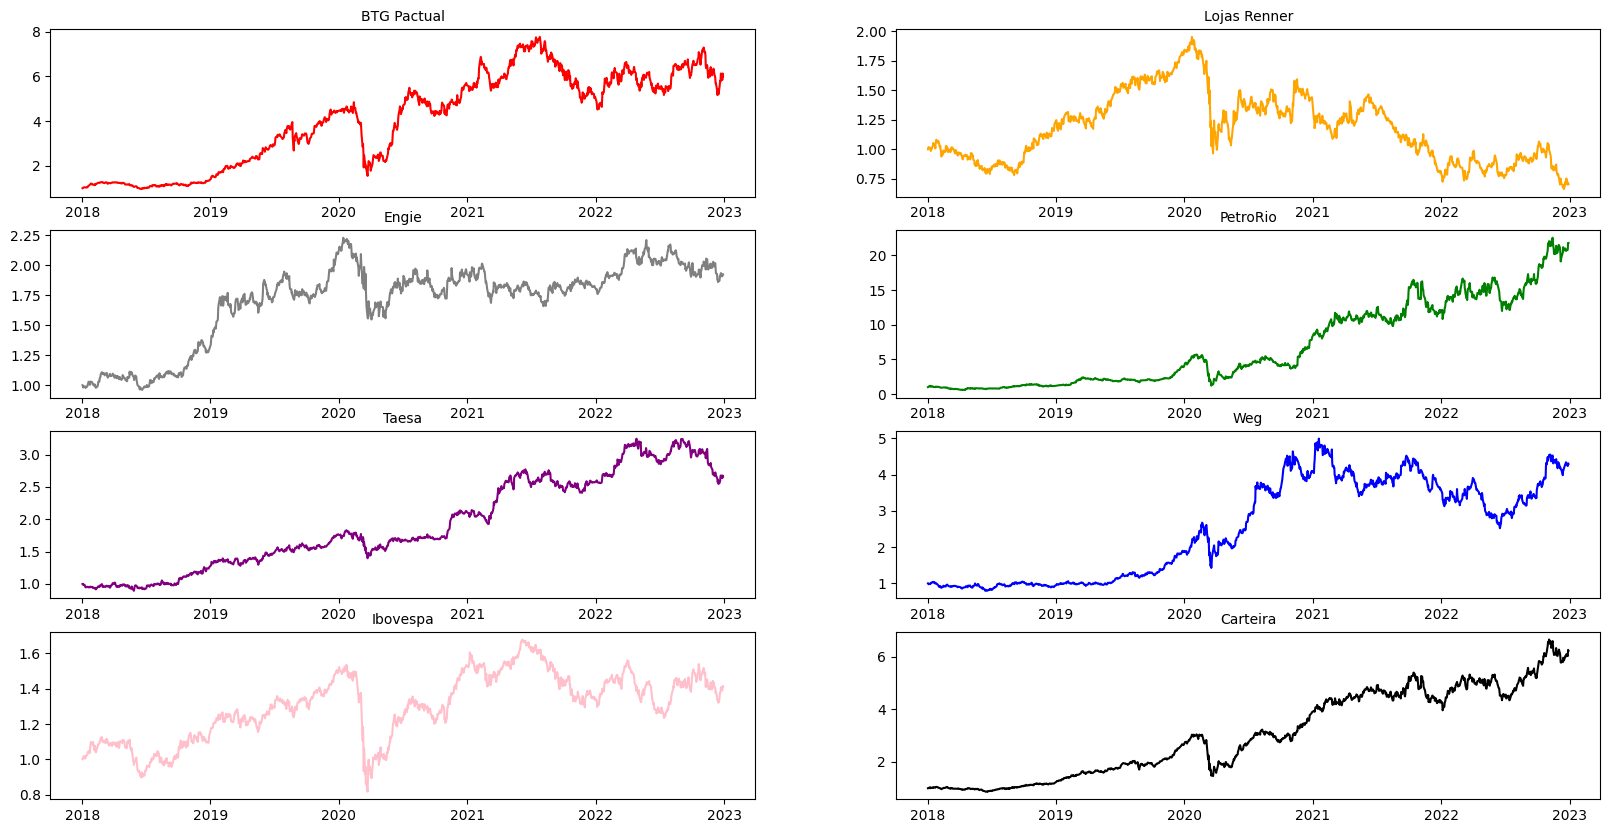

In [180]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=4, figsize=(20,10))
f1_axes[0,0].plot(consolidado_adj['BPAC11.SA'], color='red')
f1_axes[0,0].set_title('BTG Pactual',  fontsize = 10)
f1_axes[1,0].plot(consolidado_adj['EGIE3.SA'], color='gray')
f1_axes[1,0].set_title('Engie',  fontsize = 10)
f1_axes[0,1].plot(consolidado_adj['LREN3.SA'], color='orange')
f1_axes[0,1].set_title('Lojas Renner',  fontsize = 10)
f1_axes[1,1].plot(consolidado_adj['PRIO3.SA'], color='green')
f1_axes[1,1].set_title('PetroRio',  fontsize = 10)
f1_axes[2,0].plot(consolidado_adj['TAEE11.SA'], color='purple')
f1_axes[2,0].set_title('Taesa',  fontsize = 10)
f1_axes[2,1].plot(consolidado_adj['WEGE3.SA'], color='blue')
f1_axes[2,1].set_title('Weg',  fontsize = 10)
f1_axes[3,0].plot(consolidado_adj['IBOV'], color='pink')
f1_axes[3,0].set_title('Ibovespa',  fontsize = 10)
f1_axes[3,1].plot(consolidado_adj['PL Total'], color='black')
f1_axes[3,1].set_title('Carteira',  fontsize = 10)

<Axes: xlabel='Date'>

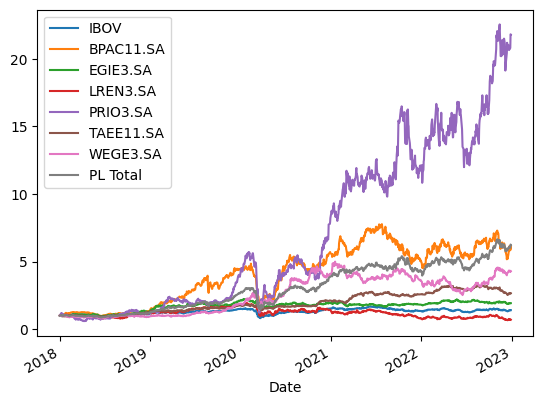

In [181]:
consolidado_adj.plot()

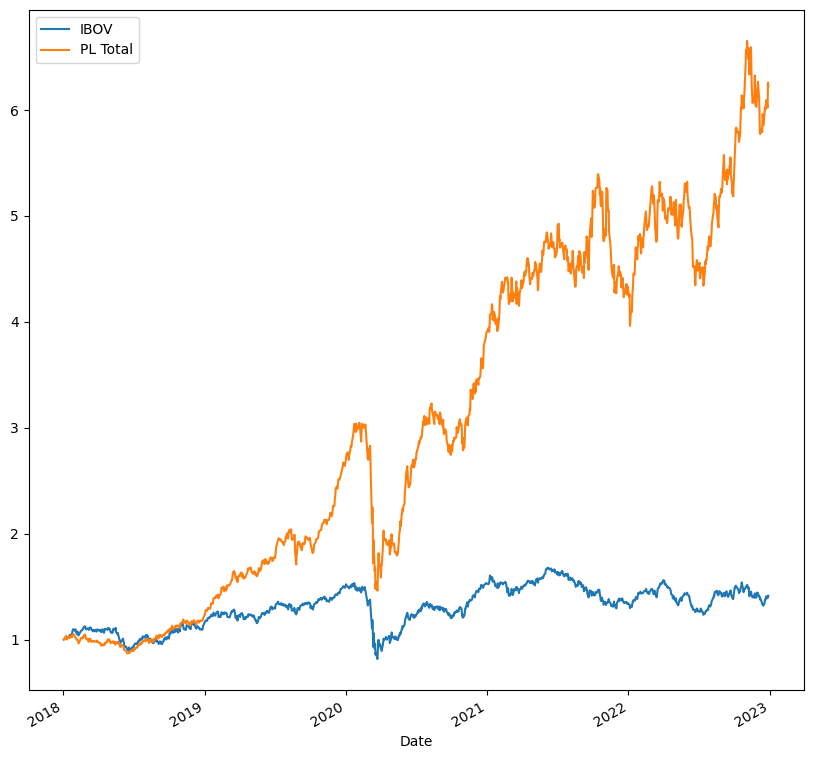

In [182]:
#minha carteira em relação ao ibov de 2018 a 2023
consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (10,10));

In [183]:
# Total de retorno em cada ativo 

In [184]:
last_row = consolidado_adj.iloc[-1]
last_row = last_row - 1
last_row = last_row * 100

In [185]:
last_row

IBOV          41.26
BPAC11.SA    498.81
EGIE3.SA      92.35
LREN3.SA     -29.60
PRIO3.SA    2077.30
TAEE11.SA    166.21
WEGE3.SA     329.35
PL Total     522.40
Name: 2022-12-29 00:00:00, dtype: float64

In [186]:
valores = [41.26, 498.81, 92.34, -29.59, 2077.29, 166.21, 329.34, 522.40]
rotulos = ['IBOV', 'BPAC11', 'EGIE3', 'LREN3', 'PRIO3', 'TAEE11', 'WEGE3', 'PL Total']

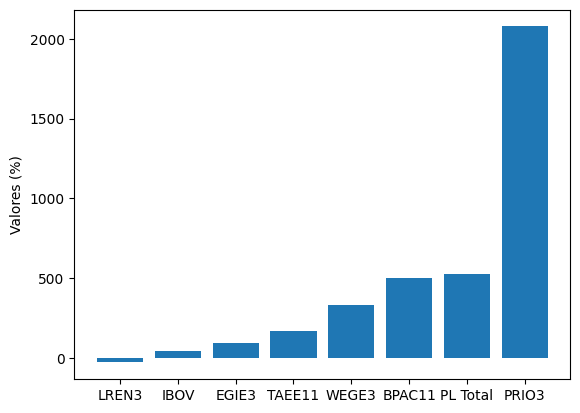

In [187]:
valores, rotulos = zip(*sorted(zip(valores, rotulos)))
plt.bar(range(len(valores)), valores)
plt.xticks(range(len(valores)), rotulos)
plt.ylabel('Valores (%)')
plt.show()

In [188]:
tickers = ['WEGE3.SA', 'LREN3.SA', 'BPAC11.SA', 'PRIO3.SA', 'EGIE3.SA', 'TAEE11.SA', '^BVSP']
valores = yf.download(tickers, start = inicio, end = fim)['Adj Close']
valores

[*********************100%***********************]  7 of 7 completed


,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA,^BVSP
Date,,,,,,,
2018-01-02,3.97,19.69,28.79,1.71,12.51,8.91,77891.00
2018-01-03,4.01,19.56,29.15,1.74,12.53,8.77,77995.00
2018-01-04,4.02,19.31,29.32,1.80,12.33,8.69,78647.00
2018-01-05,4.09,19.41,29.14,1.90,12.39,8.72,79071.00
2018-01-08,4.14,19.52,28.99,2.05,12.33,8.79,79379.00
...,...,...,...,...,...,...,...
2022-12-23,24.34,38.09,21.65,35.49,33.51,38.23,109698.00
2022-12-26,23.73,37.76,20.50,35.44,33.34,37.92,108738.00
2022-12-27,23.17,37.56,20.17,35.58,32.99,37.74,108347.00


<Axes: >

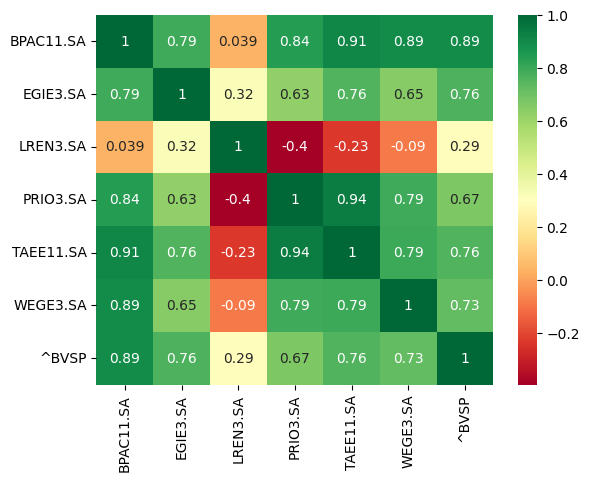

In [189]:
correlacao = valores.corr()
sns.heatmap(valores.corr(), annot=True, cmap='RdYlGn')

In [190]:
consolidado_adj.columns

Index(['IBOV', 'BPAC11.SA', 'EGIE3.SA', 'LREN3.SA', 'PRIO3.SA', 'TAEE11.SA',
       'WEGE3.SA', 'PL Total'],
      dtype='object')

In [191]:
#Risco, volatilidade e desvio padrão

In [192]:
 consolidado_adj
media = consolidado_adj.mean()
n = consolidado_adj.count()
print (f'Média Ibov: {media[0]}        | Tamanho do conjunto: Ibov: {n[0]}')
print (f'Média BTG: {media[1]}          | Tamanho do conjunto: BTG: {n[1]}')
print (f'Média Engie: {media[2]}        | Tamanho do conjunto: Engie: {n[2]}')
print (f'Média Renner: {media[3]}      | Tamanho do conjunto: Renner: {n[3]}')
print (f'Média PetroRio: {media[4]}    | Tamanho do conjunto: PetroRio: {n[4]}')
print (f'Média Taesa: {media[5]}       | Tamanho do conjunto: Taesa: {n[5]}')
print (f'Média Weg: {media[4]}         | Tamanho do conjunto: Weg: {n[4]}')
print (f'Média Carteira: {media[5]}    | Tamanho do conjunto: Carteira: {n[5]}')

Média Ibov: 1.303687307616341        | Tamanho do conjunto: Ibov: 1238
Média BTG: 4.098643383537171          | Tamanho do conjunto: BTG: 1238
Média Engie: 1.7057135863014712        | Tamanho do conjunto: Engie: 1238
Média Renner: 1.1758005137514935      | Tamanho do conjunto: Renner: 1238
Média PetroRio: 6.978772590451979    | Tamanho do conjunto: PetroRio: 1238
Média Taesa: 1.9283521323610937       | Tamanho do conjunto: Taesa: 1238
Média Weg: 6.978772590451979         | Tamanho do conjunto: Weg: 1238
Média Carteira: 1.9283521323610937    | Tamanho do conjunto: Carteira: 1238


In [193]:
desviopadrao = (((consolidado_adj - media)**2).sum()/(n-1))**0.5
desviopadrao

IBOV        0.18
BPAC11.SA   2.06
EGIE3.SA    0.33
LREN3.SA    0.29
PRIO3.SA    6.03
TAEE11.SA   0.71
WEGE3.SA    1.33
PL Total    1.64
dtype: float64

# PARTE 2

Na primeira parte do código, fizemos uma análise Micro, análisando as empresas e comparando com seu benchmkark. Agora na parte 2, iremos fazer uma análise macro, construção de modelo e composição da carteira de investimentos. Portanto, análise de portfólio e não de uma ação.

In [194]:
!pip install fundamentus
!pip install requests-cache
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [195]:
import fundamentus
import requests_cache
import requests
import time, logging
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as pdr

In [196]:
fundamentus = fundamentus.get_resultado()

In [197]:
fundamentus.columns

Index(['cotacao', 'pl', 'pvp', 'psr', 'dy', 'pa', 'pcg', 'pebit', 'pacl',
       'evebit', 'evebitda', 'mrgebit', 'mrgliq', 'roic', 'roe', 'liqc',
       'liq2m', 'patrliq', 'divbpatr', 'c5y'],
      dtype='object', name='Multiples')

In [198]:
fundamentus

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
AALR3,22.63,-11.75,2.82,2.47,0.00,1.02,-13.79,-211.35,-2.33,-275.79,33.25,-0.01,-0.20,-0.01,-0.24,0.71,10873900.00,949696000.00,1.09,0.01
ABCB3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,5205390000.00,0.00,0.28
ABCB4,16.45,4.65,0.71,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.00,14748200.00,5205390000.00,0.00,0.28
ABEV3,14.43,15.72,2.77,2.85,0.05,1.65,-83.44,14.84,-13.52,14.08,10.37,0.19,0.19,0.15,0.18,0.93,437096000.00,81955600000.00,0.05,0.13
ABYA3,4.91,-214.80,1.76,2.06,0.00,0.53,1.98,19.96,-2.75,33.67,33.67,0.10,-0.01,0.03,-0.01,2.09,0.00,292060000.00,1.31,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WLMM4,23.28,7.23,1.36,0.43,0.05,1.04,2.64,6.64,3.19,6.84,6.64,0.06,0.06,0.17,0.19,3.41,12067.70,622011000.00,0.09,0.28
WMBY3,25.39,-19.30,2.87,0.84,0.00,0.18,1.20,8.62,-1.50,25.02,25.02,0.10,-0.07,0.02,-0.15,1.44,0.00,212439000.00,6.51,-0.14
WSON33,67.00,8.07,0.98,1.07,0.00,0.40,13.41,2.42,-0.89,5.08,5.08,0.44,0.14,0.18,0.12,1.26,0.00,2148530000.00,1.21,0.05


In [199]:
fundamentus[fundamentus.index.str.startswith('WEGE3')].head(1)

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
WEGE3,38.61,38.51,10.92,5.42,0.01,5.76,17.26,28.64,23.95,28.37,25.80,0.19,0.14,0.27,0.28,1.91,263664000.00,14834800000.00,0.23,0.27


In [200]:
fundamentus[fundamentus.index.str.startswith('ITUB3')].head(1)

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
ITUB3,20.75,6.85,1.26,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.18,0.00,13082000.00,162100000000.00,0.00,-0.37


# Selecionando empresas sustentaveis e aplicando o fator Qualidade.

Primeiro vou selecionar as empresas que estão nos três índices de sustentabilidade da B3.

Em segundo, selecionar os indicadores fundamentalistas que quero usar, neste caso foi Margem Ebit, Margem Líquida, Roe e Liquidez Corrente.

Em terceiro aplico os dois filtros. 

Em quarto, aplico o fator Qualidade e assim, criamos um novo dataframe chamando 'fundamentus_fator_qualidade'.

Cada analista pode fazer o seu valor qualidade escolhendo seus indicadores e dando peso a eles, no meu caso, eu selecionei os que já mencionei e comparo o valor relativo deles em relação as outras ações e dou um valor entre 0 e 1 para cada valor em cada indicador. Depois somo os valores de cada linha e divido pelo número de indicadores. O resultado é um novo dataframe (fundamentus_fator_qualidade) com uma única coluna que contém o fator qualidade de cada ação.

Em quinto, organizo o dataframe com o Fator Qualidade em ordem decrescente para na hora de montar a carteira, ficar mais fácil de compreender quais ativos preciso comprar.

In [201]:
# Lista de ações selecionadas
sustentaveis = ['BEEF3', 'EGIE3', 'BPAC11', 'CCRO3', 'SUZB3', 'ELET6', 'SULA11', 'CPFE3', 'CIEL3', 'WEGE3', 'LREN3', 'FLRY3', 'ODPV3', 'ITUB4', 'PCAR3', 'CPLE6', 'CSAN3']

# Indicadores selecionados
#indicadores = ['mrgebit', 'mrgliq', 'roe', 'liqc']
#indicadores = ['mrgebit', 'mrgliq', 'roe', 'dy', 'liqc']
indicadores = ['pl',	'pvp',	'psr',	'dy',	'pa',	'pcg',	'pebit',	'pacl',	'evebit',	'evebitda',	'mrgebit',	'mrgliq',	'roic',	'roe',	'liqc',	'liq2m',	'patrliq',	'divbpatr',	'c5y']

# Seleciona apenas as ações e indicadores desejados
fundamentus_selecionado = fundamentus.loc[sustentaveis, indicadores]

# Aplica o fator qualidade em cada indicador
fundamentus_fator_qualidade = (fundamentus_selecionado.rank(ascending=False) / len(sustentaveis)).sum(axis=1) / len(indicadores)

fundamentus_fator_qualidade = fundamentus_fator_qualidade.sort_values(ascending=True)


In [202]:
fundamentus_fator_qualidade

papel
WEGE3    0.27
EGIE3    0.39
SUZB3    0.41
CCRO3    0.46
CSAN3    0.46
CPFE3    0.47
ELET6    0.47
LREN3    0.50
ODPV3    0.50
FLRY3    0.51
BEEF3    0.52
CPLE6    0.52
CIEL3    0.56
BPAC11   0.69
SULA11   0.73
ITUB4    0.74
PCAR3    0.80
dtype: float64

In [203]:
carteira_qualidede = ['WEGE3', 'EGIE3', 'SUZB3', 'CCRO3', 'CPFE3']

#Comparando a carteira com o benchmark 

In [204]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [205]:
import pandas_datareader.data as web
import seaborn as sns

In [206]:
carteira_qualidade = ['WEGE3.SA', 'EGIE3.SA', 'SUZB3.SA', 'CCRO3.SA', 'CPFE3.SA']
carteira = web.get_data_yahoo(carteira_qualidade, period="5y")['Adj Close']
ibov = web.get_data_yahoo("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [207]:
carteira

,CCRO3.SA,CPFE3.SA,EGIE3.SA,SUZB3.SA,WEGE3.SA
Date,,,,,
2018-04-06,10.19,16.99,21.07,34.76,7.79
2018-04-09,10.13,16.79,20.84,33.82,7.63
2018-04-10,10.28,16.87,21.23,33.64,7.70
2018-04-11,10.31,16.81,20.95,32.66,7.74
2018-04-12,10.68,16.87,21.09,33.26,7.83
...,...,...,...,...,...
2023-03-31,12.80,31.65,40.17,41.60,40.55
2023-04-03,12.64,31.67,39.66,42.74,39.59
2023-04-04,12.70,32.39,40.23,42.35,39.63


In [208]:
ibov

Date
2018-04-06    84820.00
2018-04-09    83307.00
2018-04-10    84510.00
2018-04-11    85246.00
2018-04-12    85444.00
                ...   
2023-03-31   101882.00
2023-04-03   101506.00
2023-04-04   101869.00
2023-04-05   100978.00
2023-04-06   100822.00
Name: Adj Close, Length: 1241, dtype: float64

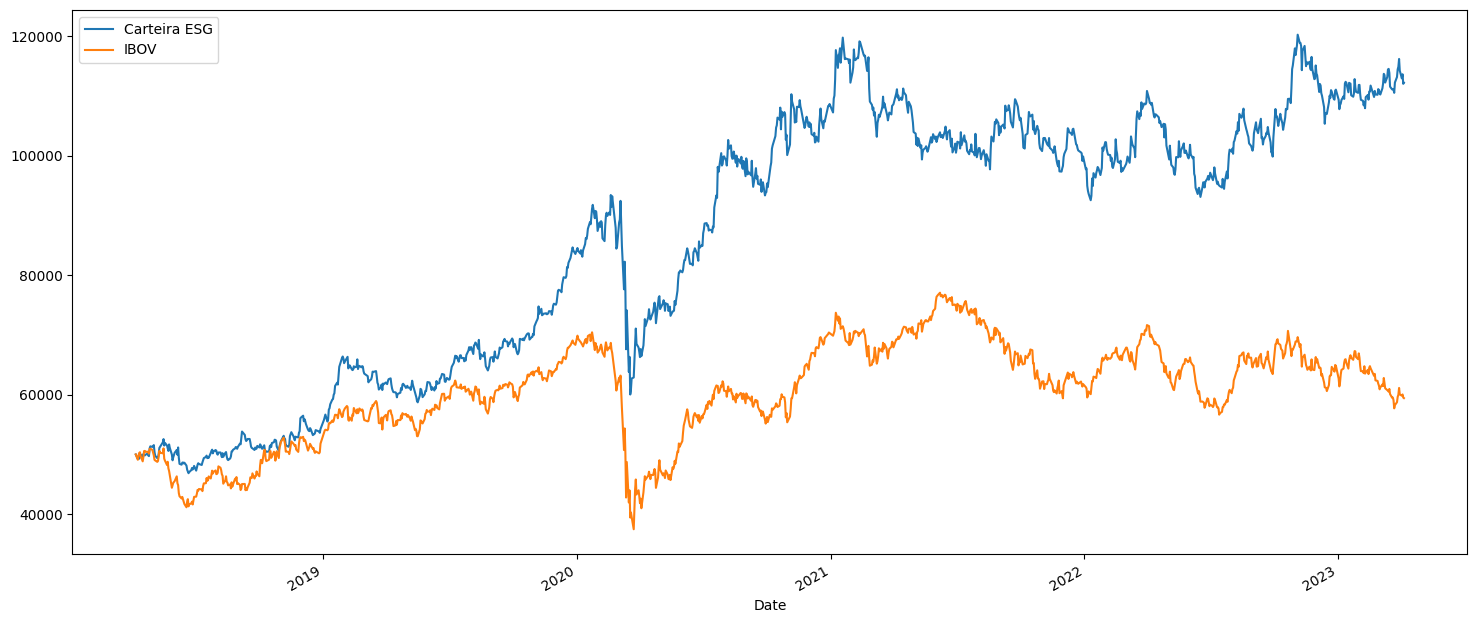

In [209]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada['saldo'] = carteira_normalizada.sum(axis=1)
ibov_normalizado = (ibov / ibov.iloc[0])*50000
carteira_normalizada["saldo"].plot(figsize=(18,8),label = "Carteira ESG")
ibov_normalizado.plot(label="IBOV")
plt.legend()

In [210]:
carteira_normalizada['saldo'] = carteira_normalizada.sum(axis=1)
carteira_normalizada

,CCRO3.SA,CPFE3.SA,EGIE3.SA,SUZB3.SA,WEGE3.SA,saldo
Date,,,,,,
2018-04-06,10000.00,10000.00,10000.00,10000.00,10000.00,100000.00
2018-04-09,9942.15,9882.49,9892.70,9731.51,9788.60,98474.90
2018-04-10,10090.91,9927.07,10075.90,9678.86,9880.51,99306.49
2018-04-11,10123.97,9894.65,9945.04,9397.21,9931.07,98583.86
2018-04-12,10487.60,9927.07,10010.47,9568.31,10045.96,100078.79
...,...,...,...,...,...,...
2023-03-31,12564.83,18626.01,19068.35,11968.77,52045.94,228547.80
2023-04-03,12407.77,18637.78,18826.26,12296.76,50813.78,225964.70
2023-04-04,12466.66,19061.50,19096.83,12184.56,50865.12,227349.35


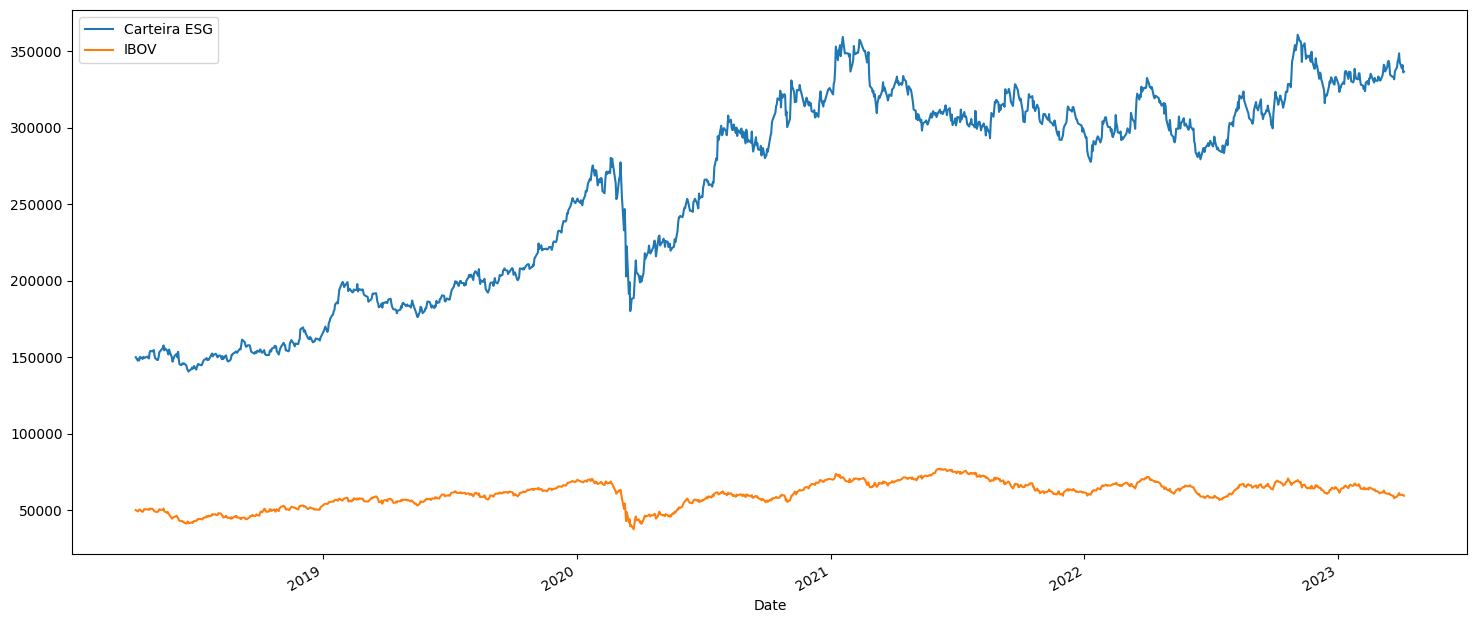

In [211]:
xcarteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada['saldo'] = carteira_normalizada.sum(axis=1)
ibov_normalizado = (ibov / ibov.iloc[0])*50000
carteira_normalizada["saldo"].plot(figsize=(18,8),label = "Carteira ESG")
ibov_normalizado.plot(label="IBOV")
plt.legend()

In [212]:
carteira_normalizada

,CCRO3.SA,CPFE3.SA,EGIE3.SA,SUZB3.SA,WEGE3.SA,saldo
Date,,,,,,
2018-04-06,10000.00,10000.00,10000.00,10000.00,10000.00,150000.00
2018-04-09,9942.15,9882.49,9892.70,9731.51,9788.60,147712.35
2018-04-10,10090.91,9927.07,10075.90,9678.86,9880.51,148959.74
2018-04-11,10123.97,9894.65,9945.04,9397.21,9931.07,147875.80
2018-04-12,10487.60,9927.07,10010.47,9568.31,10045.96,150118.19
...,...,...,...,...,...,...
2023-03-31,12564.83,18626.01,19068.35,11968.77,52045.94,342821.70
2023-04-03,12407.77,18637.78,18826.26,12296.76,50813.78,338947.05
2023-04-04,12466.66,19061.50,19096.83,12184.56,50865.12,341024.02


In [213]:
ibov_normalizado

Date
2018-04-06   50000.00
2018-04-09   49108.11
2018-04-10   49817.26
2018-04-11   50251.12
2018-04-12   50367.84
               ...   
2023-03-31   60057.77
2023-04-03   59836.12
2023-04-04   60050.11
2023-04-05   59524.88
2023-04-06   59432.92
Name: Adj Close, Length: 1241, dtype: float64

In [214]:
from sklearn.linear_model import LinearRegression

# cria um modelo linear para cada ação
models = {}
for col in carteira_normalizada.columns[:-1]:
    X = carteira_normalizada.index.to_julian_date().values.reshape(-1, 1)
    y = carteira_normalizada[col].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    models[col] = model

# define o número de dias para fazer previsões
days = 30

# cria uma nova matriz de datas para fazer as previsões
last_day = carteira_normalizada.index[-1]
next_days = pd.date_range(last_day, periods=days+1)[1:]
X_pred = np.array([date.to_julian_date() for date in next_days]).reshape(-1, 1)

# faz as previsões para cada ação usando o modelo correspondente
y_pred = np.hstack([models[col].predict(X_pred) for col in carteira_normalizada.columns[:-1]])

# cria um novo DataFrame com as previsões
pred_df = pd.DataFrame(y_pred, index=next_days, columns=carteira_normalizada.columns[:-1])

# adiciona a coluna da carteira
pred_df['carteira'] = pred_df.sum(axis=1)

# concatena o DataFrame de previsões com o DataFrame original
carteira_normalizada = pd.concat([carteira_normalizada, pred_df])


In [215]:
carteira_normalizada

,CCRO3.SA,CPFE3.SA,EGIE3.SA,SUZB3.SA,WEGE3.SA,saldo,carteira
2018-04-06,10000.00,10000.00,10000.00,10000.00,10000.00,150000.00,NaN
2018-04-09,9942.15,9882.49,9892.70,9731.51,9788.60,147712.35,NaN
2018-04-10,10090.91,9927.07,10075.90,9678.86,9880.51,148959.74,NaN
2018-04-11,10123.97,9894.65,9945.04,9397.21,9931.07,147875.80,NaN
2018-04-12,10487.60,9927.07,10010.47,9568.31,10045.96,150118.19,NaN
...,...,...,...,...,...,...,...
2023-05-02,12664.13,19160.68,20120.28,15722.06,54118.25,NaN,121785.41
2023-05-03,12664.92,19165.83,20124.25,15725.04,54143.04,NaN,121823.08
2023-05-04,12665.71,19170.98,20128.22,15728.02,54167.82,NaN,121860.75
2023-05-05,12666.49,19176.14,20132.19,15730.99,54192.61,NaN,121898.42


In [216]:
pd.options.display.float_format = '{:.2f}'.format
print(carteira_normalizada)

            CCRO3.SA  CPFE3.SA  EGIE3.SA  SUZB3.SA  WEGE3.SA     saldo  \
2018-04-06  10000.00  10000.00  10000.00  10000.00  10000.00 150000.00   
2018-04-09   9942.15   9882.49   9892.70   9731.51   9788.60 147712.35   
2018-04-10  10090.91   9927.07  10075.90   9678.86   9880.51 148959.74   
2018-04-11  10123.97   9894.65   9945.04   9397.21   9931.07 147875.80   
2018-04-12  10487.60   9927.07  10010.47   9568.31  10045.96 150118.19   
...              ...       ...       ...       ...       ...       ...   
2023-05-02  12664.13  19160.68  20120.28  15722.06  54118.25       NaN   
2023-05-03  12664.92  19165.83  20124.25  15725.04  54143.04       NaN   
2023-05-04  12665.71  19170.98  20128.22  15728.02  54167.82       NaN   
2023-05-05  12666.49  19176.14  20132.19  15730.99  54192.61       NaN   
2023-05-06  12667.28  19181.29  20136.16  15733.97  54217.39       NaN   

            carteira  
2018-04-06       NaN  
2018-04-09       NaN  
2018-04-10       NaN  
2018-04-11       Na

In [217]:
carteira_normalizada['Carteira'] = carteira_normalizada.iloc[:, :5].sum(axis=1)
carteira_normalizada = carteira_normalizada.drop(['carteira', 'saldo'], axis=1)
carteira_normalizada

,CCRO3.SA,CPFE3.SA,EGIE3.SA,SUZB3.SA,WEGE3.SA,Carteira
2018-04-06,10000.00,10000.00,10000.00,10000.00,10000.00,50000.00
2018-04-09,9942.15,9882.49,9892.70,9731.51,9788.60,49237.45
2018-04-10,10090.91,9927.07,10075.90,9678.86,9880.51,49653.25
2018-04-11,10123.97,9894.65,9945.04,9397.21,9931.07,49291.93
2018-04-12,10487.60,9927.07,10010.47,9568.31,10045.96,50039.40
...,...,...,...,...,...,...
2023-05-02,12664.13,19160.68,20120.28,15722.06,54118.25,121785.41
2023-05-03,12664.92,19165.83,20124.25,15725.04,54143.04,121823.08
2023-05-04,12665.71,19170.98,20128.22,15728.02,54167.82,121860.75
2023-05-05,12666.49,19176.14,20132.19,15730.99,54192.61,121898.42
